<AxesSubplot:xlabel='Month'>

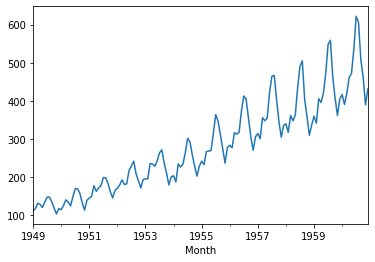

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

# 月毎の旅客機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], infer_datetime_format=True)
y = pd.Series(df_content['#Passengers'].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89012D+00    |proj g|=  6.53546D-02

At iterate    5    f=  2.87745D+00    |proj g|=  3.38361D-02

At iterate   10    f=  2.87280D+00    |proj g|=  2.01095D-02

At iterate   15    f=  2.87246D+00    |proj g|=  8.20984D-03

At iterate   20    f=  2.86793D+00    |proj g|=  7.96472D-02

At iterate   25    f=  2.86259D+00    |proj g|=  3.75447D-03

At iterate   30    f=  2.86227D+00    |proj g|=  1.31079D-03

At iterate   35    f=  2.86220D+00    |proj g|=  3.90580D-03

At iterate   40    f=  2.86219D+00    |proj g|=  4.06622D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

<BarContainer object of 120 artists>

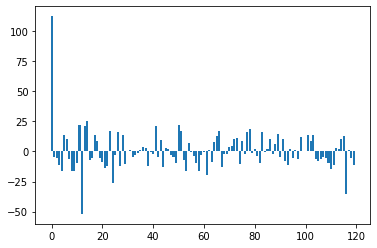

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y120 = y[:120]

p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12

result = SARIMAX(y120, order=(p,d,q), seasonal_order=(sp, sd, sq, seasonal), enforce_stationarity=False, enforce_invertibility=False).fit()

res = result.resid

plt.bar(range(len(res)), res)

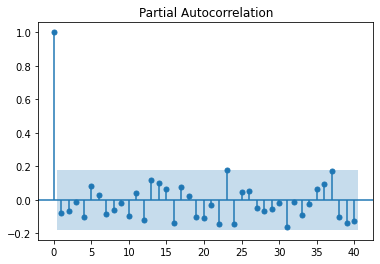

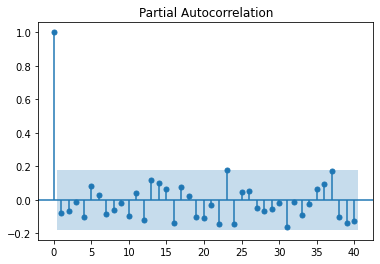

In [5]:
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res, lags=40)

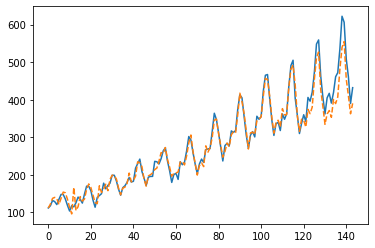

In [6]:
plt.plot(y.values, label='observation')
plt.plot(np.hstack([y120[0], result.fittedvalues[1:], result.forecast(24)]), '--', label='forecast')